In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy
from scipy.stats import linregress
import matplotlib
import bluepysnap as bp
font = {'size'   : 12}

matplotlib.rc('font', **font)
%matplotlib ipympl

In [2]:
import matplotlib
font = {'size'   : 6}

matplotlib.rc('font', **font)

In [3]:
time = np.arange(1975,2200,.1)

In [4]:
def getHistByLayer(path_to_sims,bins=None):

    numSims = 1
    numLayers = 6
    numBins = 225

    allSpikes = np.zeros([numSims,numLayers,numBins])
   
    for sim in range(numSims):

        s = bp.Simulation( path_to_sims + '/'+str(sim)+'/simulation_config.json' )

        c = s.circuit
        layerDF = list(c.nodes.get(group='hex_O1',properties=['layer']))[0][1].loc['S1nonbarrel_neurons']
    
        for layer in np.arange(1,numLayers+1):

            
            spikes = s.spikes['S1nonbarrel_neurons'].get(t_start=1975,t_stop=2200)


            layerIds = list(layerDF[layerDF['layer']==layer].index)

            spikes_layer = spikes[np.isin(spikes,layerIds)]

            if bins is None:
                
                spike_hist,bins = np.histogram(list(spikes_layer.index),bins=numBins)

            else:

                spike_hist,_ = np.histogram(list(spikes_layer.index),bins=bins)
        
            allSpikes[sim,layer-1] = spike_hist

    return allSpikes, bins
        
    

In [5]:
def getHistByType(path_to_sims,typeList,bins=None):

    numSims = 10
    numLayers = len(typeList)
    numBins = 225

    allSpikes = np.zeros([numSims,numLayers,numBins])
   
    for sim in range(numSims):

        s = bp.Simulation( path_to_sims + '/'+str(sim)+'/simulation_config.json' )

        c = s.circuit
        typeDF = list(c.nodes.get(group='hex_O1',properties=['mtype']))[0][1].loc['S1nonbarrel_neurons']
    
        for i, t in enumerate(typeList):

            
            spikes = s.spikes['S1nonbarrel_neurons'].get(t_start=1975,t_stop=2200)


            typeIds = list(typeDF[typeDF['mtype']==t].index)

            spikes_type = spikes[np.isin(spikes,typeIds)]

            if bins is None:
                
                spike_hist,bins = np.histogram(list(spikes_type.index),bins=numBins)

            else:

                spike_hist,_ = np.histogram(list(spikes_type.index),bins=bins)

        
            allSpikes[sim,i] = spike_hist


    return allSpikes, bins

In [6]:
def getHistAllTypes(path_to_sims,bins=None):

    numSims = 10
    numBins = 225

    allSpikes = {}

    s = bp.Simulation( path_to_sims + '/0/simulation_config.json' )
    c = s.circuit
    typeDF = list(c.nodes.get(group='hex_O1',properties=['mtype']))[0][1].loc['S1nonbarrel_neurons']

    typeList = np.unique(typeDF['mtype'].values)

    for i, t in enumerate(typeList):

        print(t)

        allSpikes[t] = np.zeros([numSims,numBins])

        typeIDs = list(typeDF[typeDF['mtype']==t].index)
   
        for sim in range(numSims):

            print(sim)
        
            s = bp.Simulation( path_to_sims + '/'+str(sim)+'/simulation_config.json' )
        
            spikes = s.spikes['S1nonbarrel_neurons'].get(group=typeIDs,t_start=1975,t_stop=2200)
        
            if bins is None:
                
                spike_hist,bins = np.histogram(list(spikes.index),bins=numBins)
        
            else:
        
                spike_hist,_ = np.histogram(list(spikes.index),bins=bins)
        
        
            allSpikes[t][sim] = spike_hist 


    return allSpikes, bins

In [7]:
def getBinsByType(path_to_sims,typeList,bins=None):

    numSims = 1
    numTypes = 1
    numBins = 225

    allSpikes = np.zeros([numSims,numTypes,numBins])

    
   
    for sim in range(numSims):

        s = bp.Simulation( path_to_sims + '/'+str(sim)+'/simulation_config.json' )

        c = s.circuit
        typeDF = list(c.nodes.get(group='hex_O1',properties=['mtype']))[0][1].loc['S1nonbarrel_neurons']
    
        for i, t in enumerate(typeList[:numTypes]):

            
            spikes = s.spikes['S1nonbarrel_neurons'].get(t_start=1975,t_stop=2200)


            typeIds = list(typeDF[typeDF['mtype']==t].index)

            spikes_type = spikes[np.isin(spikes,typeIds)]

            if bins is None:
                
                spike_hist,bins = np.histogram(list(spikes_type.index),bins=numBins)

            else:

                spike_hist,_ = np.histogram(list(spikes_type.index),bins=bins)

            
        
            allSpikes[sim,i] = spike_hist

            

    return allSpikes, bins

In [11]:
typeList = ["L1_DAC",
    "L1_HAC",
    "L1_LAC",
    "L1_NGC-DA",
    "L1_NGC-SA",
    "L1_SAC",
    "L23_NGC", 
    "L4_NGC", 
    "L5_NGC", 
    "L6_NGC",
    "L23_LBC",
    "L4_LBC", 
    "L5_LBC", 
    "L6_LBC",
    "L23_NBC", 
    "L4_NBC", 
    "L5_NBC", 
    "L6_NBC",
    "L23_BTC",
    "L23_SBC",
    "L4_BTC", 
    "L4_SBC",
    "L5_BTC", 
    "L5_SBC",
    "L6_BTC", 
    "L6_SBC"
           ]

In [8]:
import bluepysnap as bp

s = '../original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/'
s1 = 'f090d92c-29b1-4033-96d2-e1a67b33dab6/'



In [10]:
spikes_original, bins = getHistByLayer(s)

bins_hist = bins

bins = (bins[:-1]+bins[1:])/2

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fffe2f16bd0>>
Traceback (most recent call last):
  File "/gpfs/bbp.cscs.ch/home/tharayil/conntilitEnv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fffe2f16bd0>>
Traceback (most recent call last):
  File "/gpfs/bbp.cscs.ch/home/tharayil/conntilitEnv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [9]:
s2 = '../disconnected/d851ea52-d571-420f-bd23-d77489af0fac/'

spikes_disconnected, _ = getHistByLayer(s2,bins_hist)

NameError: name 'bins_hist' is not defined

In [10]:
spikes_rewired, _ = getHistByLayer(s1,bins_hist)

NameError: name 'bins_hist' is not defined

In [14]:
s3 = 'replay/c6c46053-7bd4-475d-8919-b3ac90585eea'
spikes_rewired_disconnected, _ = getHistByLayer(s3,bins_hist)

In [22]:
s4 = 'disconnected/57b80d17-695c-48b6-a1f9-ff8639b077ad'
spikes_rewired_disconnected_noReplay, _ = getHistByLayer(s4,bins_hist)

In [ ]:
np.save('spikes_original.npy',spikes_original)
np.save('spikes_rewired.npy',spikes_rewired)
np.save('spikes_disconnected.npy',spikes_disconnected)


In [13]:
spikes_original = np.load('spikes_original.npy')
spikes_rewired = np.load('spikes_rewired.npy')
spikes_disconnected = np.load('spikes_disconnected.npy')


NameError: name 'spikes_rewired_disconnected' is not defined

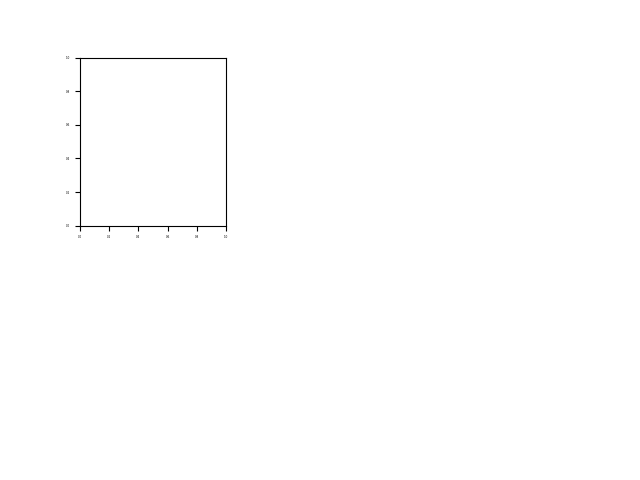

In [25]:
plt.figure()
for i in np.arange(2,7):
    ax = plt.subplot(2,3,i-1)
    plt.plot(bins,spikes_rewired_disconnected[0][i-1])
    plt.plot(bins,spikes_rewired_disconnected_noReplay[0][i-1])

In [50]:
spikes_original_type, bins = getHistAllTypes(s)

bins_hist = bins

bins = (bins[:-1]+bins[1:])/2

L1_DAC
0
1
2
3
4
5
6
7
8
9
L1_HAC
0
1
2
3
4
5
6
7
8
9
L1_LAC
0
1
2
3
4
5
6
7
8
9
L1_NGC-DA
0
1
2
3
4
5
6
7
8
9
L1_NGC-SA
0
1
2
3
4
5
6
7
8
9
L1_SAC
0
1
2
3
4
5
6
7
8
9
L23_BP
0
1
2
3
4
5
6
7
8
9
L23_BTC
0
1
2
3
4
5
6
7
8
9
L23_CHC
0
1
2
3
4
5
6
7
8
9
L23_DBC
0
1
2
3
4
5
6
7
8
9
L23_LBC
0
1
2
3
4
5
6
7
8
9
L23_MC
0
1
2
3
4
5
6
7
8
9
L23_NBC
0
1
2
3
4
5
6
7
8
9
L23_NGC
0
1
2
3
4
5
6
7
8
9
L23_SBC
0
1
2
3
4
5
6
7
8
9
L2_IPC
0
1
2
3
4
5
6
7
8
9
L2_TPC:A
0
1
2
3
4
5
6
7
8
9
L2_TPC:B
0
1
2
3
4
5
6
7
8
9
L3_TPC:A
0
1
2
3
4
5
6
7
8
9
L3_TPC:C
0
1
2
3
4
5
6
7
8
9
L4_BP
0
1
2
3
4
5
6
7
8
9
L4_BTC
0
1
2
3
4
5
6
7
8
9
L4_CHC
0
1
2
3
4
5
6
7
8
9
L4_DBC
0
1
2
3
4
5
6
7
8
9
L4_LBC
0
1
2
3
4
5
6
7
8
9
L4_MC
0
1
2
3
4
5
6
7
8
9
L4_NBC
0
1
2
3
4
5
6
7
8
9
L4_NGC
0
1
2
3
4
5
6
7
8
9
L4_SBC
0
1
2
3
4
5
6
7
8
9
L4_SSC
0
1
2
3
4
5
6
7
8
9
L4_TPC
0
1
2
3
4
5
6
7
8
9
L4_UPC
0
1
2
3
4
5
6
7
8
9
L5_BP
0
1
2
3
4
5
6
7
8
9
L5_BTC
0
1
2
3
4
5
6
7
8
9
L5_CHC
0
1
2
3
4
5
6
7
8
9
L5_DBC
0
1
2
3
4
5
6
7
8
9
L5_LBC
0
1

In [15]:
_, bins = getBinsByType(s,typeList)

bins_hist = bins

bins = (bins[:-1]+bins[1:])/2

In [23]:
bins_hist.shape

(226,)

In [ ]:
spikes_rewired_type, _ = getHistByType(s1,typeList,bins_hist)

In [ ]:
np.save('spikes_original_type.npy',spikes_original_type)

In [ ]:
np.save('spikes_rewiredtype.npy',spikes_rewired_type)

In [16]:
spikes_original_type = np.load('spikes_original_type.npy')
spikes_rewired_type = np.load('spikes_rewiredtype.npy')

In [17]:
def getPvals(spikes1, spikes2):

    result = scipy.stats.ttest_ind(spikes1, spikes2,equal_var=False)

    return result.pvalue*len(result.pvalue)

In [18]:
pvals = getPvals(spikes_original,spikes_rewired)

In [19]:
pvalsDisconnected = getPvals(spikes_original,spikes_disconnected)

In [20]:
pvalsType = getPvals(spikes_original_type,spikes_rewired_type)

In [17]:
pvalsType.shape

(26, 225)

In [21]:
rewiredIndices = []
for pval in pvals:
    rewiredIndices.append(np.where(pval < 0.01)[0])

In [22]:
disconnectedIndices = []
for pval in pvalsDisconnected:
    disconnectedIndices.append(np.where(pval < 0.01)[0])

In [23]:
typeIndices = []
for pval in pvalsType:
    typeIndices.append(np.where(pval < 0.05/26)[0])

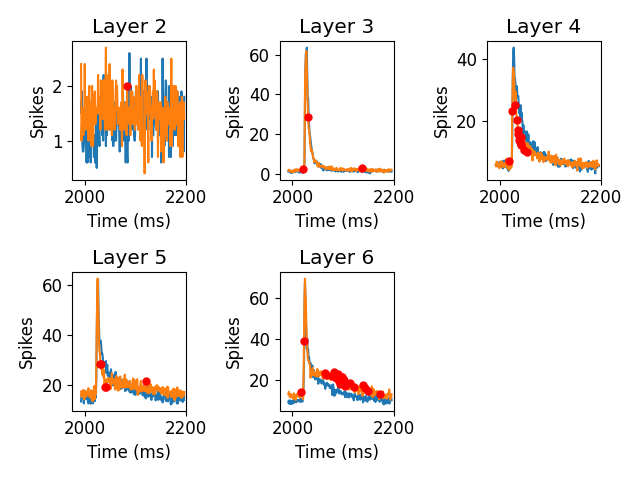

In [28]:
fig = plt.figure()
for i in np.arange(2,7):
    ax = plt.subplot(2,3,i-1)
    plt.plot(bins,np.mean(spikes_original,axis=0)[i-1])
    plt.plot(bins,np.mean(spikes_rewired,axis=0)[i-1])
    plt.plot(bins[rewiredIndices[i-1]],np.mean(spikes_rewired,axis=0)[i-1][rewiredIndices[i-1]],'o',c='r',markersize=5)
    plt.title('Layer '+str(i))
    plt.xlim([1975,2200])

    plt.xlabel('Time (ms)')

    plt.ylabel('Spikes')

    # ax.set_xticks([2000,2200],['0','200'])

    plt.tight_layout()

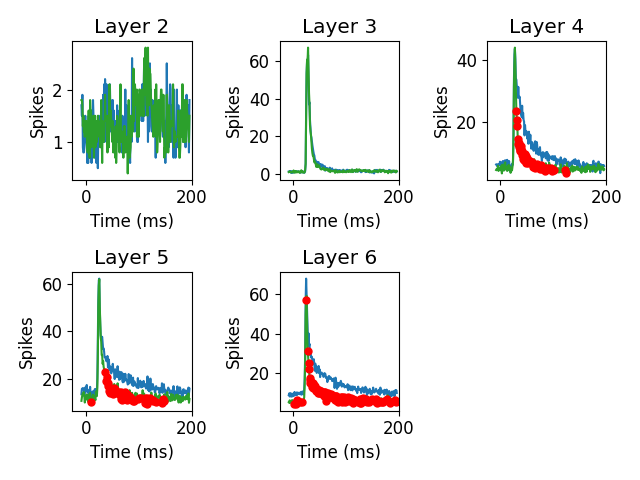

In [29]:
fig = plt.figure()
for i in np.arange(2,7):
    ax = plt.subplot(2,3,i-1)

    plt.title('Layer '+str(i))
    
    plt.plot(bins,np.mean(spikes_original,axis=0)[i-1])
    plt.plot(bins,np.mean(spikes_disconnected,axis=0)[i-1],c='C2')
    plt.plot(bins[disconnectedIndices[i-1]],np.mean(spikes_disconnected,axis=0)[i-1][disconnectedIndices[i-1]],'o',c='r',markersize=5)
    plt.xlim([1975,2200])

    plt.xlabel('Time (ms)')

    plt.ylabel('Spikes')

    ax.set_xticks([2000,2200],['0','200'])

    plt.tight_layout()

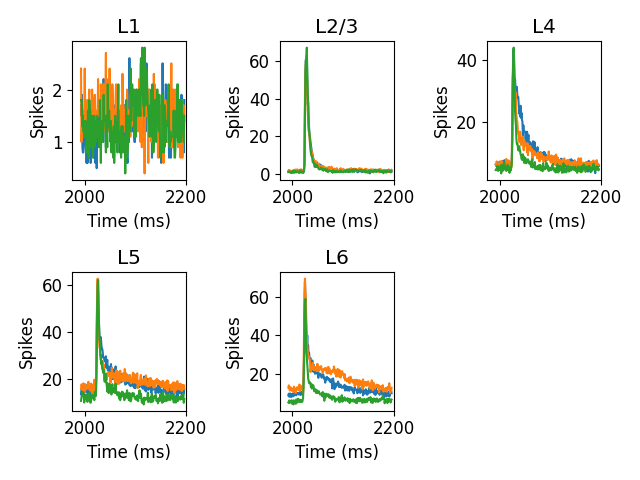

In [50]:
fig = plt.figure()

titles = ['L1','L2/3','L4','L5','L6']
for i in np.arange(2,7):
    ax = plt.subplot(2,3,i-1)
    plt.plot(bins,np.mean(spikes_original,axis=0)[i-1])
    plt.plot(bins,np.mean(spikes_rewired,axis=0)[i-1])
    plt.plot(bins,np.mean(spikes_disconnected,axis=0)[i-1],c='C2')
    # plt.plot(bins[rewiredIndices[i-1]],np.mean(spikes_rewired,axis=0)[i-1][rewiredIndices[i-1]],'o',c='r',markersize=5)
    # plt.plot(bins[disconnectedIndices[i-1]],np.mean(spikes_disconnected,axis=0)[i-1][disconnectedIndices[i-1]],'o',c='r',markersize=5)

    plt.title(titles[i-2])
    plt.xlim([1975,2200])

    plt.xlabel('Time (ms)')

    plt.ylabel('Spikes')

    # ax.set_xticks([2000,2200],['0','200'])

    plt.tight_layout()

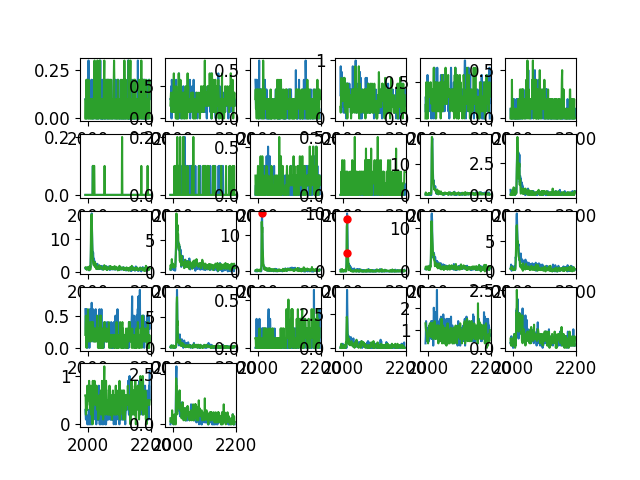

In [43]:
fig = plt.figure()
for i in np.arange(1,27):
    plt.subplot(5,6,i)
    plt.plot(bins,np.mean(spikes_original_type,axis=0)[i-1])
    plt.plot(bins,np.mean(spikes_rewired_type,axis=0)[i-1],c='C2')
    plt.plot(bins[typeIndices[i-1]],np.mean(spikes_original_type,axis=0)[i-1][typeIndices[i-1]],'o',c='r',markersize=5)
    plt.xlim([1975,2200])

In [32]:
def getEEGs_byLayer(path):

    EEG_byLayer = []

    for i in range(10):

        E0 = []


        EEGs = {}
    
        for file in os.listdir(path+'/'+str(i)+'/pkls'):
            t = file.split('.')[0].split('g')[1]
            
            EEGs[t] = pd.read_pickle(path+'/'+str(i)+'/pkls/'+file).values[19750:22000,0] 


        
        for l, layer in enumerate(np.arange(2,7)):

            E = 0

            for t in EEGs.keys():
                if str(layer) in t:

                        
                    E += EEGs[t]

            E0.append(E)

        EEG_byLayer.append(E0)

    EEG_byLayer = np.array(EEG_byLayer)

    EEG_byLayer -= np.mean(EEG_byLayer,axis=-1)[:,:,np.newaxis]

    return EEG_byLayer

In [33]:
def meanAndCI(EEGs):

    mean = np.mean(EEGs,axis=0)

    lowerbound = scipy.stats.t.ppf(0.05,9,mean,np.std(EEGs,axis=0))
    upperbound = scipy.stats.t.ppf(0.95,9,mean,np.std(EEGs,axis=0))

    return mean, lowerbound, upperbound

In [34]:
def getByLayer(path):

    EEGs = np.array(getEEGs_byLayer(path))
    mean, lowerbound, upperbound = meanAndCI(EEGs)

    return mean, lowerbound, upperbound 

In [35]:
EEGs,_,_ = getByLayer('../original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd')
EEGsRewired,_,_ = getByLayer('f090d92c-29b1-4033-96d2-e1a67b33dab6/')
EEGsDisconnected,_,_ = getByLayer('../disconnected/d851ea52-d571-420f-bd23-d77489af0fac/')

In [36]:
EEGsByType = np.load(s+'EEGs.npy',allow_pickle=True).item()

In [44]:
EEGs.shape

(5, 2250)

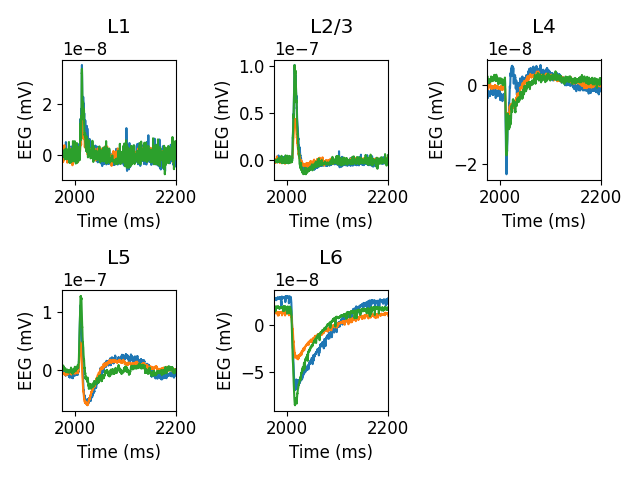

In [51]:
titles = ['L1','L2/3','L4','L5','L6']

fig = plt.figure()
for i in np.arange(2,7):
    ax = plt.subplot(2,3,i-1)
    plt.plot(time,EEGs[i-2])
    plt.plot(time,EEGsRewired[i-2])
    plt.plot(time,EEGsDisconnected[i-2],c='C2')
    # plt.plot(bins[rewiredIndices[i-1]],np.mean(spikes_rewired,axis=0)[i-1][rewiredIndices[i-1]],'o',c='r',markersize=5)
    # plt.plot(bins[disconnectedIndices[i-1]],np.mean(spikes_disconnected,axis=0)[i-1][disconnectedIndices[i-1]],'o',c='r',markersize=5)

    plt.title(titles[i-2])
    plt.xlim([1975,2200])

    plt.xlabel('Time (ms)')

    plt.ylabel('EEG (mV)')

    # ax.set_xticks([2000,2200],['0','200'])

    plt.tight_layout()

In [37]:
correlationMatrix = np.zeros([60,60])

keyList = np.sort(list(EEGsByType.keys()))

for i in range(60):
    
    spikeKey = keyList[i]
    
    for j in range(60):
        
        eegKey = keyList[j]
        
        correlationMatrix[i,j] = scipy.stats.pearsonr(np.mean(spikes_original_type[spikeKey],axis=0),EEGsByType[eegKey][timeIndices][:,0]).statistic

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [80]:
keyList

array(['L1_DAC', 'L1_HAC', 'L1_LAC', 'L1_NGC-DA', 'L1_NGC-SA', 'L1_SAC',
       'L23_BP', 'L23_BTC', 'L23_CHC', 'L23_DBC', 'L23_LBC', 'L23_MC',
       'L23_NBC', 'L23_NGC', 'L23_SBC', 'L2_IPC', 'L2_TPC:A', 'L2_TPC:B',
       'L3_TPC:A', 'L3_TPC:C', 'L4_BP', 'L4_BTC', 'L4_CHC', 'L4_DBC',
       'L4_LBC', 'L4_MC', 'L4_NBC', 'L4_NGC', 'L4_SBC', 'L4_SSC',
       'L4_TPC', 'L4_UPC', 'L5_BP', 'L5_BTC', 'L5_CHC', 'L5_DBC',
       'L5_LBC', 'L5_MC', 'L5_NBC', 'L5_NGC', 'L5_SBC', 'L5_TPC:A',
       'L5_TPC:B', 'L5_TPC:C', 'L5_UPC', 'L6_BP', 'L6_BPC', 'L6_BTC',
       'L6_CHC', 'L6_DBC', 'L6_HPC', 'L6_IPC', 'L6_LBC', 'L6_MC',
       'L6_NBC', 'L6_NGC', 'L6_SBC', 'L6_TPC:A', 'L6_TPC:C', 'L6_UPC'],
      dtype='<U9')

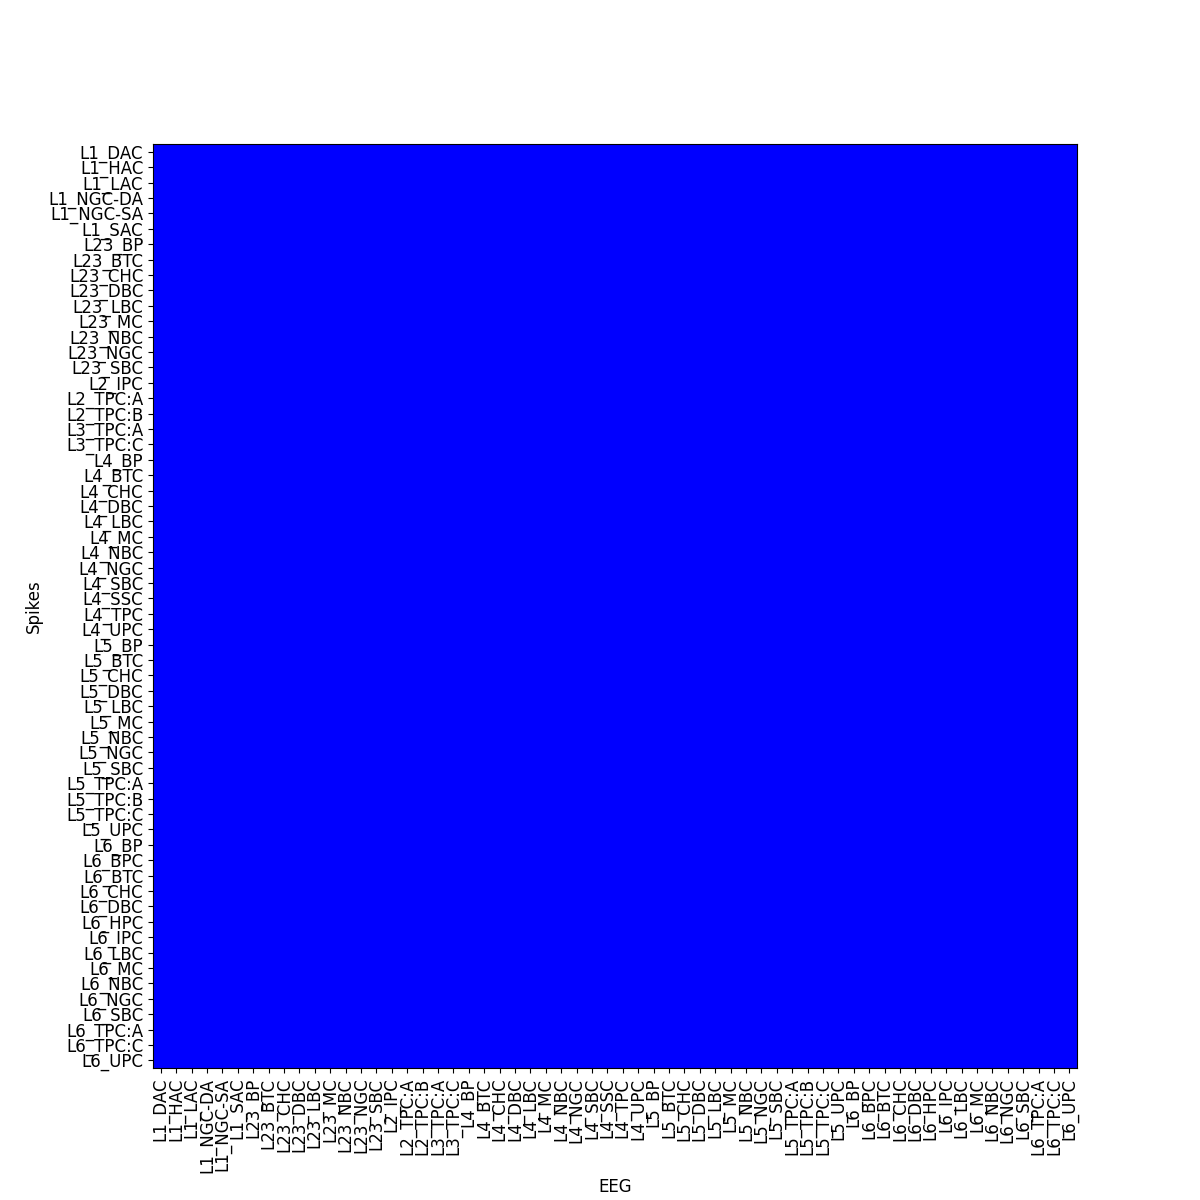

In [38]:
plt.figure(figsize=(12,12))
plt.imshow(correlationMatrix,cmap='bwr')
plt.yticks(np.arange(60),labels=keyList)
plt.xticks(np.arange(60),labels=keyList,rotation=90)
plt.ylabel('Spikes')
plt.xlabel('EEG')
plt.show()

In [55]:
timeIndices = []
for t in bins:
    index = np.argmin(np.abs(t-time))
    timeIndices.append(index)

In [40]:
correlations = []
correlationsRewired = []
correlationsDisconnected = []

for layer in range(5):

    correlation = scipy.stats.pearsonr(np.mean(spikes_original,axis=0)[layer+1],EEGs[layer,timeIndices])
    correlationRewired = scipy.stats.pearsonr(np.mean(spikes_rewired,axis=0)[layer+1],EEGsRewired[layer,timeIndices])
    correlationDisconnected = scipy.stats.pearsonr(np.mean(spikes_disconnected,axis=0)[layer+1],EEGsDisconnected[layer,timeIndices])

    correlations.append(correlation)
    correlationsRewired.append(correlationRewired)
    correlationsDisconnected.append(correlationDisconnected)
    

In [47]:
r0 = []
rr = []
rd = []
for i in range(5):
    r0.append(correlations[i].statistic)
    rr.append(correlationsRewired[i].statistic)
    rd.append(correlationsDisconnected[i].statistic)

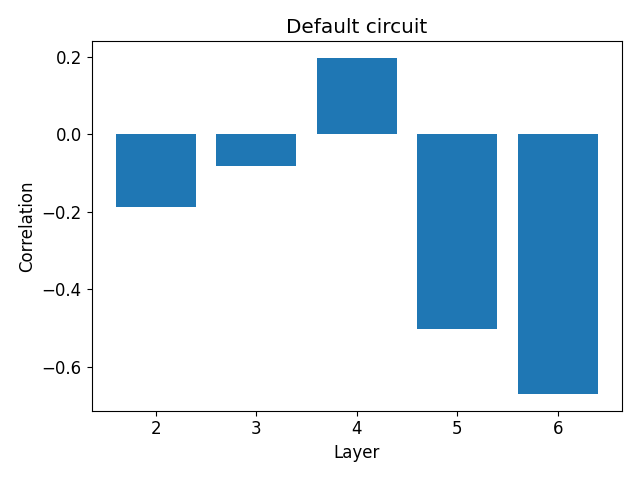

In [50]:
plt.figure()
plt.bar(np.arange(2,7),r0)
plt.xlabel('Layer')
plt.ylabel('Correlation')
plt.title('Default circuit')
plt.tight_layout()

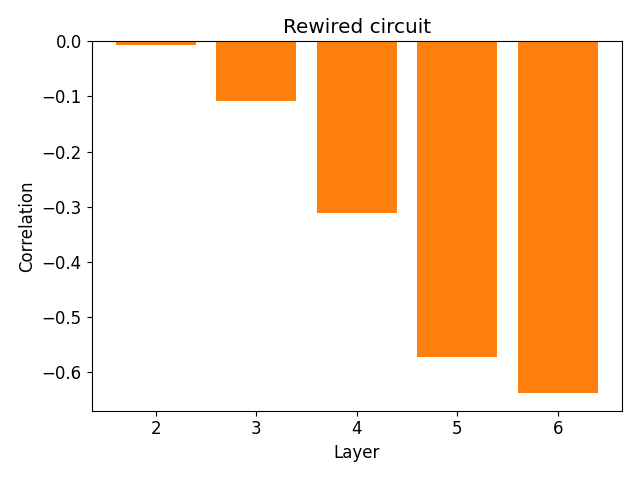

In [52]:
plt.figure()
plt.bar(np.arange(2,7),rr,color='C1')
plt.xlabel('Layer')
plt.ylabel('Correlation')
plt.title('Rewired circuit')
plt.tight_layout()

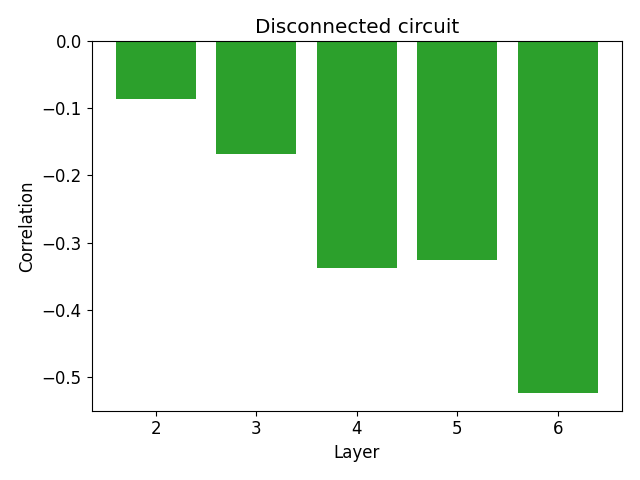

In [53]:
plt.figure()
plt.bar(np.arange(2,7),rd,color='C2')
plt.xlabel('Layer')
plt.ylabel('Correlation')
plt.title('Disconnected circuit')
plt.tight_layout()

In [54]:
correlations

[PearsonRResult(statistic=-0.18794088727486247, pvalue=0.004674311705990803),
 PearsonRResult(statistic=-0.08258459716476023, pvalue=0.2172110170293851),
 PearsonRResult(statistic=0.19602845753138282, pvalue=0.003149558545596678),
 PearsonRResult(statistic=-0.5026379206257352, pvalue=8.29416568339558e-16),
 PearsonRResult(statistic=-0.6690974306013754, pvalue=1.4214625853156547e-30)]

In [55]:
correlationsRewired

[PearsonRResult(statistic=-0.006721883708072044, pvalue=0.9201317256014788),
 PearsonRResult(statistic=-0.10857858725005114, pvalue=0.10428760755362242),
 PearsonRResult(statistic=-0.3115927561473866, pvalue=1.8692384958262351e-06),
 PearsonRResult(statistic=-0.5726959125022563, pvalue=5.23092445144118e-21),
 PearsonRResult(statistic=-0.6382233770623656, pvalue=3.875089289771833e-27)]

In [43]:
correlationsDisconnected

[PearsonRResult(statistic=-0.08561557366903248, pvalue=0.20074527569714212),
 PearsonRResult(statistic=-0.16787485263421437, pvalue=0.011668268048704),
 PearsonRResult(statistic=-0.3372685178770666, pvalue=2.1772967603813395e-07),
 PearsonRResult(statistic=-0.3265883486612005, pvalue=5.454821339094939e-07),
 PearsonRResult(statistic=-0.524591269633719, pvalue=2.612945107942171e-17)]

In [ ]:
plt.figure()
